In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [382]:
df = pd.read_csv("homeprices_banglore.csv")
df.head(
)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [383]:
#Sclaing 
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [384]:
# Store and scale the values in an array without the price column
x_scaled = sx.fit_transform(df.drop('price',axis='columns'))

In [385]:
# store only the price column values and reshape it
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))


In [386]:
def batch_gradient_descent(x,y,epoch,rate,thresold):
    n_features = x.shape[1] # number of features  = number of columns 
    w = np.ones(shape= n_features) # weight for every feature
    b = 0

    n_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []

    for i in range(epoch):

        y_predicted = np.dot(w,x.T) + b # w·x + b 

        # Use the derivate of x for w and x for b and compute it
        w_grad = -(2/n_samples) * (x.T.dot(y - y_predicted)) 
        b_grad = -(2/n_samples) * np.sum(y-y_predicted)

        # Compute the new values of w and b

        w = w - rate*w_grad
        b = b - rate*b_grad

        # Calculate the error with the MSE : Mean Squared Error
        cost = np.mean(np.square(y-y_predicted)) 

        # Every 10 epochs store the cost and the number of epochs
        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"Epoch {i}, Cost: {cost:.4f}")

        if (cost <= thresold):
            break

    return w,b,cost,cost_list,epoch_list


In [387]:
w,b,cost,cost_list,epoch_list = batch_gradient_descent(x_scaled,y_scaled.reshape(y_scaled.shape[0],), epoch= 5000, rate = 0.01,thresold=0.0001)
w,b,cost

Epoch 0, Cost: 0.2769
Epoch 1, Cost: 0.2628
Epoch 2, Cost: 0.2494
Epoch 3, Cost: 0.2368
Epoch 4, Cost: 0.2249
Epoch 5, Cost: 0.2136
Epoch 6, Cost: 0.2029
Epoch 7, Cost: 0.1928
Epoch 8, Cost: 0.1833
Epoch 9, Cost: 0.1743
Epoch 10, Cost: 0.1657
Epoch 11, Cost: 0.1577
Epoch 12, Cost: 0.1500
Epoch 13, Cost: 0.1428
Epoch 14, Cost: 0.1360
Epoch 15, Cost: 0.1295
Epoch 16, Cost: 0.1234
Epoch 17, Cost: 0.1176
Epoch 18, Cost: 0.1122
Epoch 19, Cost: 0.1070
Epoch 20, Cost: 0.1021
Epoch 21, Cost: 0.0975
Epoch 22, Cost: 0.0931
Epoch 23, Cost: 0.0890
Epoch 24, Cost: 0.0851
Epoch 25, Cost: 0.0814
Epoch 26, Cost: 0.0779
Epoch 27, Cost: 0.0746
Epoch 28, Cost: 0.0714
Epoch 29, Cost: 0.0685
Epoch 30, Cost: 0.0656
Epoch 31, Cost: 0.0630
Epoch 32, Cost: 0.0605
Epoch 33, Cost: 0.0581
Epoch 34, Cost: 0.0558
Epoch 35, Cost: 0.0537
Epoch 36, Cost: 0.0517
Epoch 37, Cost: 0.0498
Epoch 38, Cost: 0.0480
Epoch 39, Cost: 0.0463
Epoch 40, Cost: 0.0446
Epoch 41, Cost: 0.0431
Epoch 42, Cost: 0.0416
Epoch 43, Cost: 0.040

(array([0.75542854, 0.41583882]),
 np.float64(-0.11684836015389075),
 np.float64(0.0034259177049509168))

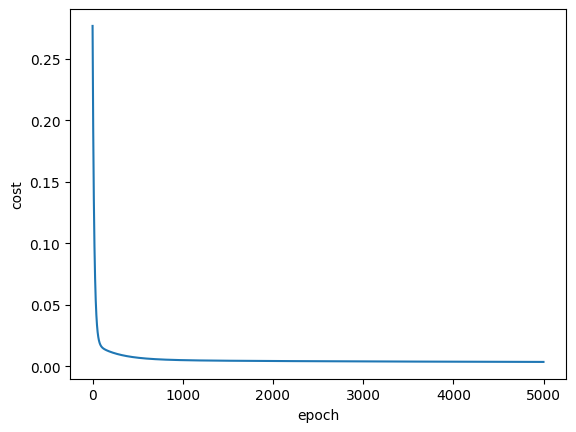

In [388]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [389]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

cost

np.float64(0.0034259177049509168)

In [390]:
import random 

def stochastic_gradient_descent(x, y, epoch, rate):
    n_features = x.shape[1]
    w = np.ones(shape=n_features)
    b = 0

    n_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []

    for i in range(epoch):
        random_index = random.randint(0, n_samples-1)
        sample_x = x[random_index]
        sample_y = y[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        # Corrected gradient calculations (remove division by n_samples)
        error = y_predicted - sample_y
        w_grad = 2 * error * sample_x  # Gradient for weights
        b_grad = 2 * error             # Gradient for bias

        # Update parameters
        w = w - rate * w_grad
        b = b - rate * b_grad

        # Calculate MSE for the current sample
        cost = (sample_y - y_predicted) ** 2

        # Track cost every 10 epochs
        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"Epoch {i}, Cost: {cost:.4f}")


    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),1000,rate = 0.01)


cost_sgd

Epoch 0, Cost: 0.4366
Epoch 1, Cost: 0.2750
Epoch 2, Cost: 0.0931
Epoch 3, Cost: 0.1527
Epoch 4, Cost: 0.1448
Epoch 5, Cost: 0.2343
Epoch 6, Cost: 0.0534
Epoch 7, Cost: 0.3315
Epoch 8, Cost: 0.7581
Epoch 9, Cost: 0.0514
Epoch 10, Cost: 0.1507
Epoch 11, Cost: 0.1094
Epoch 12, Cost: 0.0421
Epoch 13, Cost: 0.2376
Epoch 14, Cost: 0.0229
Epoch 15, Cost: 0.1215
Epoch 16, Cost: 0.5550
Epoch 17, Cost: 0.0050
Epoch 18, Cost: 0.0102
Epoch 19, Cost: 0.0119
Epoch 20, Cost: 0.2112
Epoch 21, Cost: 0.0874
Epoch 22, Cost: 0.0990
Epoch 23, Cost: 0.0940
Epoch 24, Cost: 0.0893
Epoch 25, Cost: 0.0848
Epoch 26, Cost: 0.0110
Epoch 27, Cost: 0.0105
Epoch 28, Cost: 0.0771
Epoch 29, Cost: 0.0602
Epoch 30, Cost: 0.0474
Epoch 31, Cost: 0.0200
Epoch 32, Cost: 0.0434
Epoch 33, Cost: 0.0505
Epoch 34, Cost: 0.0049
Epoch 35, Cost: 0.0593
Epoch 36, Cost: 0.0563
Epoch 37, Cost: 0.0882
Epoch 38, Cost: 0.0859
Epoch 39, Cost: 0.0001
Epoch 40, Cost: 0.0802
Epoch 41, Cost: 0.0000
Epoch 42, Cost: 0.0026
Epoch 43, Cost: 0.000

np.float64(0.0007375613569905558)

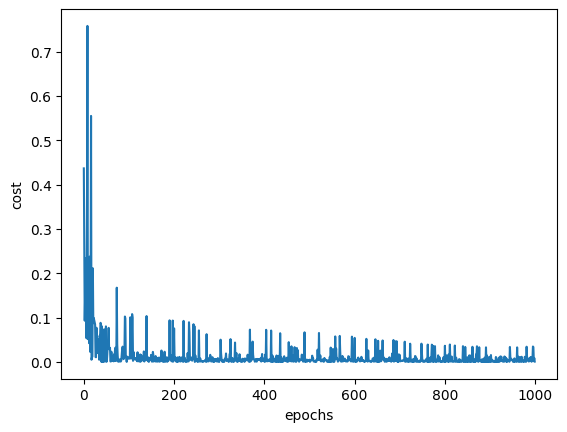

In [391]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

exo to do: do the mini batch gd


In [392]:
def mini_batch_SGD(x, y, epochs, rate, batch_size=None):
    # Ensure y is a 1D array
    if y.ndim > 1 and y.shape[1] == 1:
        y = y.flatten()
    

    n_samples, n_features = x.shape
    
    # If batch_size is not provided or is too large, default to a small mini-batch size.
    if batch_size is None or batch_size >= n_samples:
        batch_size = max(1, n_samples // 100)
    
    # Initialize weights and bias (for a linear model: prediction = w·x + b)
    w = np.ones(n_features)  # shape: (n_features,)
    b = 0.0

    cost_list = []
    epoch_list = []

    for epoch in range(epochs):
        # Shuffle the dataset at the beginning of each epoch
        indices = np.random.permutation(n_samples)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        # Process the dataset in mini-batches
        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            batch_x = x_shuffled[start:end]
            batch_y = y_shuffled[start:end]

            # Compute predictions for the mini-batch
            y_pred = np.dot(batch_x, w) + b  # shape: (batch_size,)

            # Compute the error (difference between actual and predicted)
            error = batch_y - y_pred  # shape: (batch_size,)

            # Compute gradients for the mini-batch
            w_grad = -2 * np.dot(batch_x.T, error) / batch_x.shape[0]
            b_grad = -2 * np.sum(error) / batch_x.shape[0]

            # Update weights and bias
            w = w - rate * w_grad
            b = b - rate * b_grad

        # Optionally, compute and store the cost (MSE) on the entire dataset every 10 epochs
        if epoch % 10 == 0:
            y_pred_all = np.dot(x, w) + b
            cost = np.mean((y - y_pred_all) ** 2)
            cost_list.append(cost)
            epoch_list.append(epoch)
            print(f"Epoch {epoch}, Cost: {cost:.4f}")

    return w, b, cost, cost_list, epoch_list

w_mini_SGD, b_mini_SGD, cost_mini_SGD, cost_mini_list, epoch_mini_list = mini_batch_SGD(x_scaled, y_scaled, epochs=100, rate=0.1,batch_size=5)


Epoch 0, Cost: 0.0341
Epoch 10, Cost: 0.0074
Epoch 20, Cost: 0.0052
Epoch 30, Cost: 0.0047
Epoch 40, Cost: 0.0044
Epoch 50, Cost: 0.0041
Epoch 60, Cost: 0.0040
Epoch 70, Cost: 0.0039
Epoch 80, Cost: 0.0038
Epoch 90, Cost: 0.0037


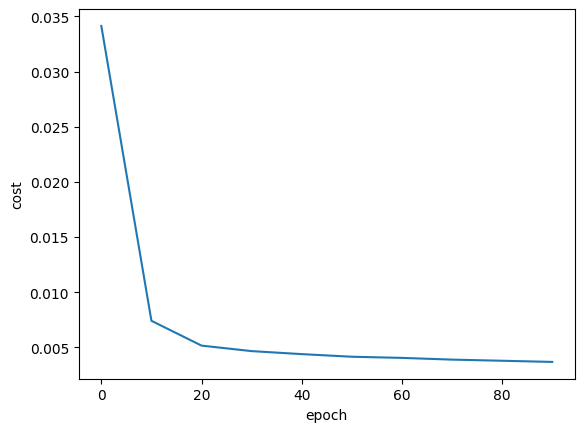

In [393]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_mini_list,cost_mini_list)